# 한국판 케빈 베이컨 놀이
$$ $$
지난 포스팅에서 "한국인 영화배우를 대상으로 케빈 베이컨 놀이"를 직접 해보았습니다.  
이번에는 시각화의 일환으로 네트워크 맵을 그려보겠습니다. 
* [지난 포스팅으로 돌아가기](http://drkevin22.github.io/SixDegreeKorVer/Korean_Six_Degrees_of_Kevin_Bacon)

In [1]:
# 작업경로 확인
getwd()

# 작업경로 변경
setwd("./data")

# 저장된 Rdata 확인
list.files(pattern = "Rdata")

# 경고문구 출력되지 않도록 설정
options(warn = -1)

[1] "/Users/drkevin/Documents/GitHub/DrKevin22/SixDegreeKorVer"

[1] "Korean_Six_Degrees.Rdata"

In [2]:
# Rdata 불러오기
load("Korean_Six_Degrees.Rdata")

# 객체 리스트 확인
ls()

[1] "actorList" "actors"    "actors1"   "actorsDf"  "actorsMul" "coDf"     
 [7] "df"        "df1"       "df2"       "graphObj"  "i"         "maDf"     
[13] "maMat"     "movieList" "myearList" "numActor"  "numMovie"  "ones"     
[19] "pathMean"  "shortPath" "zeros"

In [3]:
# 작업 대상 행렬(actorsMul)의 행이름, 열이름을 배우이름으로 변경
# 현재 행렬은 1913명의 배우코드가 오름차순으로 정렬되어 있음 
dim(actorsMul)
rownames(actorsMul[1:10,])

[1] 1913 1913

[1] "100207" "100854" "100860" "101096" "102416" "102521" "10319"  "10320" 
 [9] "103201" "10338"

In [4]:
# actors(데이터 프레임)에서 배우코드를 오름차순 정렬
actors <- actors[order(actors$actorCode),]

# actorsMul 행이름과 매칭되는 배우이름만 가져옴 
actorNames <- actors$actorName[actors$actorCode %in% rownames(actorsMul)]
length(actorNames)

[1] 1913

In [5]:
# 배우이름 확인
actorNames[1:10]

[1] "박해진" "임형태" "이아린" "이명행" "붐"     "임주환" "이휘재" "조희봉"
 [9] "보아"   "장항선"

In [6]:
# 배우코드의 순서와 맞는지 확인
actors[actors$actorCode %in% rownames(actorsMul)[1:10],]

,actorCode,actorName,movieCnt
24,100207,박해진,12
85,100854,임형태,24
109,100860,이아린,14
137,101096,이명행,12
203,102416,붐,13
230,102521,임주환,17
287,10319,이휘재,38
325,10320,조희봉,64
389,103201,보아,11
425,10338,장항선,57


In [7]:
# 행이름과 열이름 바꾸기
rownames(actorsMul) <- colnames(actorsMul) <- actorNames

In [8]:
# 배우 간 행렬(actorsMul) 이름 변경 여부 확인
actorsMul[1:10,1:10]

,박해진,임형태,이아린,이명행,붐,임주환,이휘재,조희봉,보아,장항선
박해진,0,0,0,0,0,0,0,0,0,0
임형태,0,0,0,0,0,0,0,0,0,0
이아린,0,0,0,0,0,0,0,0,0,0
이명행,0,0,0,0,0,0,0,0,0,0
붐,0,0,0,0,0,0,1,0,0,0
임주환,0,0,0,0,0,0,0,0,0,0
이휘재,0,0,0,0,1,0,0,0,0,0
조희봉,0,0,0,0,0,0,0,0,0,1
보아,0,0,0,0,0,0,0,0,0,0
장항선,0,0,0,0,0,0,0,1,0,0


## Social Network Analysis 

In [9]:
# 라이브러리 불러오기
library(network)
library(sna)
library(GGally)
library(scales)

network: Classes for Relational Data
Version 1.13.0 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.

Loading required package: statnet.common

Attaching package: ‘statnet.common’

The following object is masked from ‘package:base’:

    order

sna: Tools for Social Network Analysis
Version 2.4 created on 2016-07-23.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.



In [10]:
# 배우 간 동시 출연 여부 행렬(actorsMul)을 이용하여 
# 네트워크 맵에 필요한 네트워크 객체 생성
# 방향성이 없는 "무향 네트워크"로 생성하기 위해 directed 인자에 FALSE 할당
(netActors <- network(x = actorsMul, 
                      directed = FALSE))

 Network attributes:
  vertices = 1913 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 20722 
    missing edges= 0 
    non-missing edges= 20722 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names not shown 

In [11]:
# 각 노드별 중개중심성(betweenness centrality) 계산
# 중개중심성은 노드와 노드를 연결해주는 거리가 짧을수록 큰 값을 가짐
# 중개중심성이 클수록 중심(hub) 역할을 하는 노드로 간주
# [주의] igraph 패키지의 betweenness() 함수와 충돌 가능!!
btwness <- betweenness(netActors)
length(btwness)

[1] 1913

In [12]:
# 각 꼭지점별 연결중심성(degree centrality) 계산
# 연결중심성은 하나의 노드에 연결되어 있는 다른 노드의 수
# [주의] igraph 패키지의 betweenness() 함수와 충돌 가능!!
degree <- degree(netActors)
length(degree)

[1] 1913

In [13]:
# 중개중심성과 연결중심성 높은 배우 리스트 확인을 위해 데이터프레임으로 정리하기 
networkDf <- data.frame(actorCode = rownames(actorsMul),
                        btwness = btwness,
                        degree = degree)

# 첫 10줄만 미리보기
head(networkDf, 10L)

actorCode,btwness,degree
박해진,1315.68638,30
임형태,0.00000,2
이아린,43.53923,8
이명행,55.42994,6
붐,49.43505,8
임주환,492.18473,24
이휘재,4487.64029,28
조희봉,60749.86177,286
보아,401.23670,6
장항선,6854.56292,122


In [14]:
# 중개중심성이 큰 배우 리스트 확인 (상위 20명)
networkDf <- networkDf[order(networkDf$btwness, decreasing = TRUE),]
head(networkDf, 20L)

# 영화 "도가니"에서 교장선생님으로 열연하신 "장광"이 가장 높은 중개중심성을 보임
# 하지만 연결중심성이 상대적으로 작음
# 아마도 주/조연급 배우로 크레딧에 오른 영화의 수가 작기 때문으로 판단됨 

,actorCode,btwness,degree
1435,장광,116910.96,104
1844,이한위,109891.97,428
320,김갑수,97719.07,442
1639,이순재,82329.38,384
1788,안내상,78549.53,336
1148,정인기,76554.50,268
690,박근형,73446.20,356
1336,엄상현,69236.88,28
854,박철민,68574.96,298
505,성동일,66040.37,270


In [15]:
# 이번에는 연결중심성 상위 20명 확인
networkDf <- networkDf[order(networkDf$degree, decreasing = TRUE),]
head(networkDf, 20L)

# 가장 많은 배우들과 함께 출연한 한국 배우는 "김갑수"
# 그러나 중개중심성이 높음(배우들 간 연결고리가 짧은) 사람은 "이한위"

,actorCode,btwness,degree
320,김갑수,97719.07,442
1844,이한위,109891.97,428
1639,이순재,82329.38,384
690,박근형,73446.20,356
1578,이정길,55409.89,346
1788,안내상,78549.53,336
461,김영옥,58416.13,334
1786,김혜옥,62296.12,330
486,안석환,55103.97,324
694,김응수,59146.43,320


## 네트워크 맵에 사용될 각종 인자값 설정
$$ $$
- 노드의 컬러는 중개중심성 상위 2%에 금색(gold) 지정, 나머지는 밝은회색(gray80)으로 처리
- 노드의 크기를 연결중심성에 비례하여 설정 
- 엣지(연결선)의 두께는 함께 출연한 횟수로 정함 

In [16]:
# 중개중심성 상위 2%인 기준 확인
(quant98 <- quantile(x = btwness, probs = 0.98))

98% 
34031.18

In [17]:
# 중개중심성 상위 2%인 배우들에게 "star" 지정 
netActors %v% "color" <- ifelse(btwness > quant98, "Star", "Normal")

# "Star"가 할당된 배우의 수 확인
table(netActors %v% "color")


Normal   Star 
  1874     39 

In [18]:
# 중개중심성이 상위 2%인 배우의 노드에 금색(gold) 할당
nodeColors <- c("Star" = "gold",
                "Normal" = "gray80")

In [19]:
# 엣지의 두께 설정
# 상관관계 행렬이 있으면 상관계수로 설정할 수 있으나 
# 이번 예제에서는 배우 간 행렬을 이용함 
set.edge.value(x = netActors,
               attrname = "edgeSize",
               value = actorsMul * 0.1)

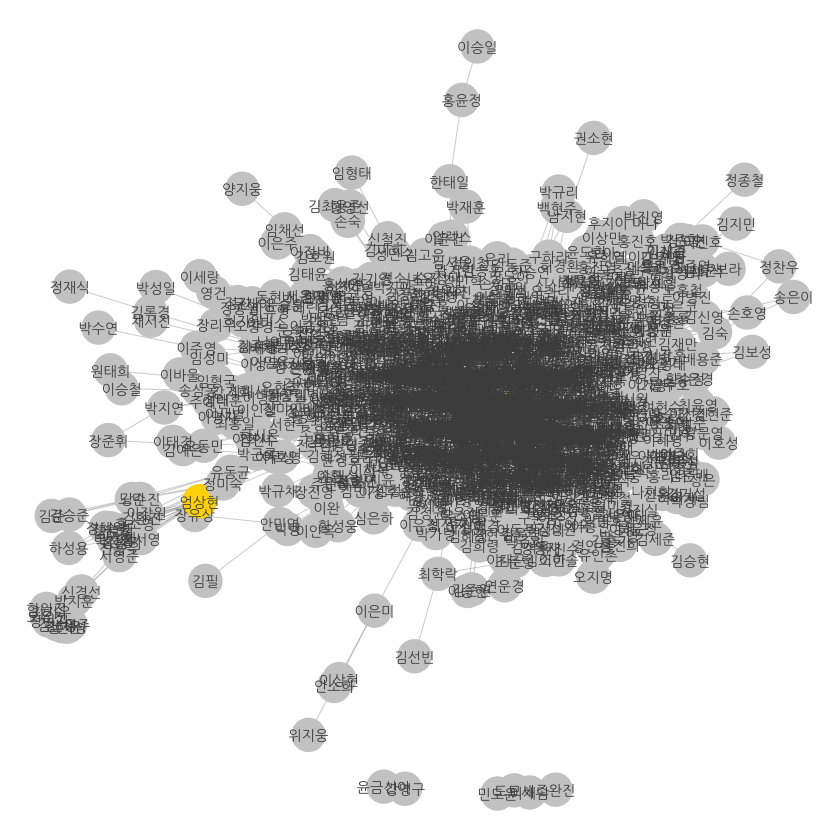

In [20]:
# 네트워크 맵 그리기
ggnet2(
    # 네트워크 객체 할당 
    net = netActors,
    
    # 겹치는 노드를 흩어지게 처리
    layout.par = list(cell.jitter = 0.8),
    
    # 노드에 레이블 출력 여부 설정
    label = TRUE,
    
    # 레이블의 폰트 사이즈 설정
    label.size = 3,
    
    # 레이블의 컬러 설정
    label.color = "gray30",
    
    # 노드의 색상을 구분하는 기준. 위에서 만든 'color'를 사용
    # "color" 대신에 "white"처럼 전체 노드에 대해 하나의 색상으로 지정 가능
    node.color = "color",
    
    # 노드의 색상 팔레트
    palette = nodeColors,
    
    # 노드의 크기를 연결중심성(degree centrality)에 비례하도록 설정
    node.size = "degree",
    
    # 엣지의 두께는 함께 출연한 횟수에 비례하도록 설정 
    edge.size = "edgeSize",
    
    # 범례 위치 지정. 이번 예제에서는 범례를 출력하지 않도록 설정
    legend.position = "None",
    
    # 네트워크 모양 설정 
    # "circle","kamadakawai","fruchtermanreingold","circrand"
    mode = "fruchtermanreingold",
    
    # 글자 폰트 지정
    family = "NanumGothic")

In [21]:
# 중요 인물들(금색 노드)은 일반 배우들에 파묻혀 있을 정도로 
# 네트워크 맵이 너무 커서 제대로 알아볼 수가 없음!!

## 특정 인물들을 중심으로 네트워크 맵 그리기

In [22]:
# 중개중심성 상위 3명에 대해서 네트워크 맵 그리기
keyActors <- c("장광","이한위","김갑수")

# 상위 3명에 대해 배우 간 행렬을 아래와 같이 변형함
# 배우 간 행렬에서 상위 3명의 열(컬럼)만 남기고, 행에서는 상위 3명을 제거
keyActorsMul <- actorsMul
keyActorsMul <- keyActorsMul[, keyActors]
keyActorsMul <- keyActorsMul[!rownames(keyActorsMul) %in% keyActors,]

# 행의 합이 0 초과인 값만 남기기
# 즉, 상위 3명과 함께 영화에 출연한 적이 있는 배우들만 남기기
keyActorsMul <- keyActorsMul[rowSums(keyActorsMul) > 0,]

In [23]:
# 앞에서 생성한 배우 간 행렬을 이용하여 네트워크 객체를 생성
# 비대칭형 네트워크인 경우, matrix.type = "bipartite"를 추가해주어야 함
(netKeyActors <- network(x = keyActorsMul, 
                         directed = FALSE, 
                         matrix.type = "bipartite"))

 Network attributes:
  vertices = 410 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = 407 
  total edges= 485 
    missing edges= 0 
    non-missing edges= 485 

 Vertex attribute names: 
    vertex.names 

No edge attributes

In [24]:
# 각 노드별 중개중심성(betweenness centrality) 계산
btwness <- betweenness(netKeyActors)

# 각 노드별 연결중심성(degree centrality) 계산
degree <- degree(netKeyActors)

In [25]:
# 노드 컬러 지정
quant98 <- quantile(btwness, probs = 0.98)
netKeyActors %v% "color" <- ifelse(btwness > quant98, "star", "normal")
nodeColors <- c("star" = "gold",
                "normal" = "gray80")

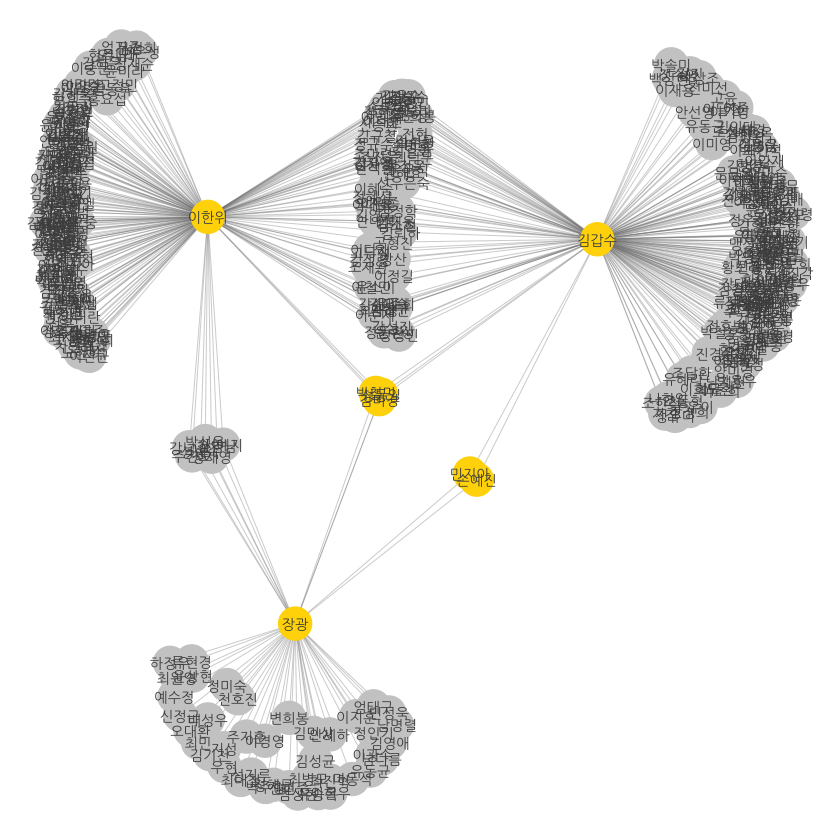

In [26]:
# 네트워크 맵 그리기
ggnet2(
    # 네트워크 객체 할당 
    net = netKeyActors,
    
    # 겹치는 노드를 흩어지게 처리
    layout.par = list(cell.jitter = 0.8),
    
    # 노드에 레이블 출력 여부 설정
    label = TRUE,
    
    # 레이블의 폰트 사이즈 설정
    label.size = 3,
    
    # 레이블의 컬러 설정
    label.color = "gray30",
    
    # 노드의 색상을 구분하는 기준. 위에서 만든 'color'를 사용
    # "color" 대신에 "white"처럼 전체 노드에 대해 하나의 색상으로 지정 가능
    node.color = "color",
    
    # 노드의 색상 팔레트
    palette = nodeColors,
    
    # 노드의 크기를 연결중심성(degree centrality)에 비례하도록 설정
    node.size = "degree",
    
    # 엣지의 두께는 특정 숫자로 고정
    edge.size = 0.1,
    
    # 범례 위치 지정. 이번 예제에서는 범례를 출력하지 않도록 설정
    legend.position = "None",
    
    # 네트워크 모양 설정 
    # "circle","kamadakawai","fruchtermanreingold","circrand"
    mode = "fruchtermanreingold",
    
    # 글자 폰트 지정
    family = "NanumGothic")

# End of Document